## Basic Community Detection

This code performs community detection in a graph using the Girvan-Newman algorithm. 
It iteratively removes edges with high betweenness centrality, leading to the identification 
of communities (clusters of nodes) in the graph.

In [1]:
import networkx as nx
import community as community_louvain 

import matplotlib.pyplot as plt
import numpy as np

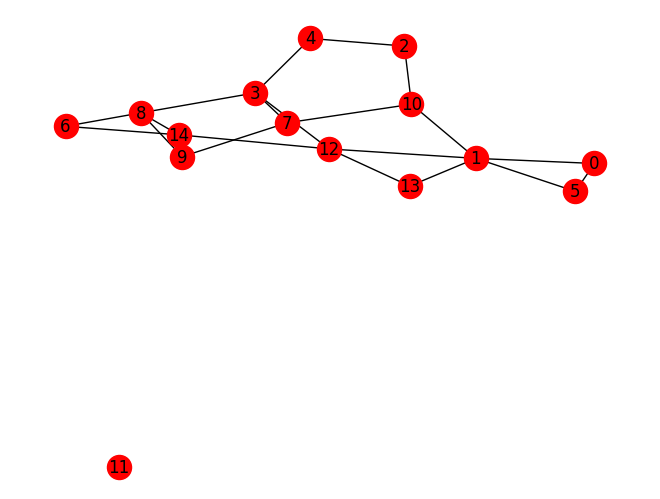

In [66]:
# Generate a random graph with 15 nodes and edge probability of 0.3
G = nx.gnp_random_graph(15, 0.25)

# For simplicity you can also create a manual graph with specific points mentioned below
#G = nx.Graph()
#G.add_edges_from([[1,2], [2,3], [1,3], [1,4], [1,5], [3,5],    
#                  [6,7], [7,8], [8,9], [6,9], [6,8], [7,9],
#                  [10,11], [11,12], [10,12],
#                  [9,12], [2,7]])


nx.draw(G, with_labels=True, node_color='r')

In [67]:
#from itertools import combinations

# Calculate the total number of pairs using combinations
#total_pairs = len(list(combinations(G.nodes(), 2)))
#total_pairs

Step 0
Current modularity: 0.389196675900277
Best modularity: 0



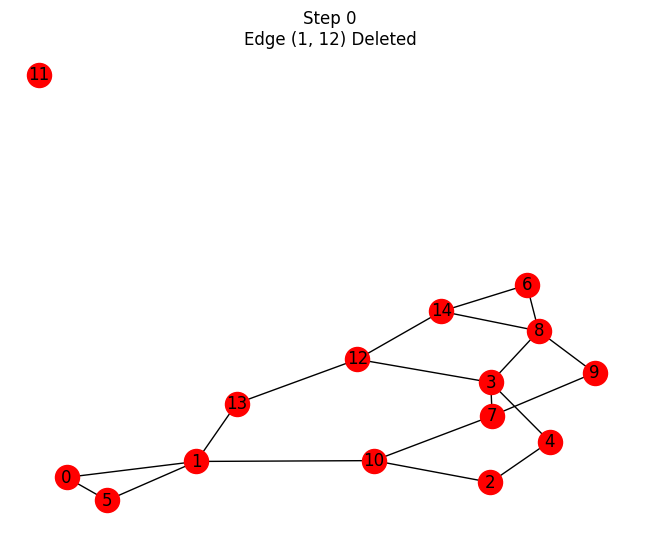

 --------------- 

Step 1
Current modularity: 0.43055555555555547
Best modularity: 0.389196675900277



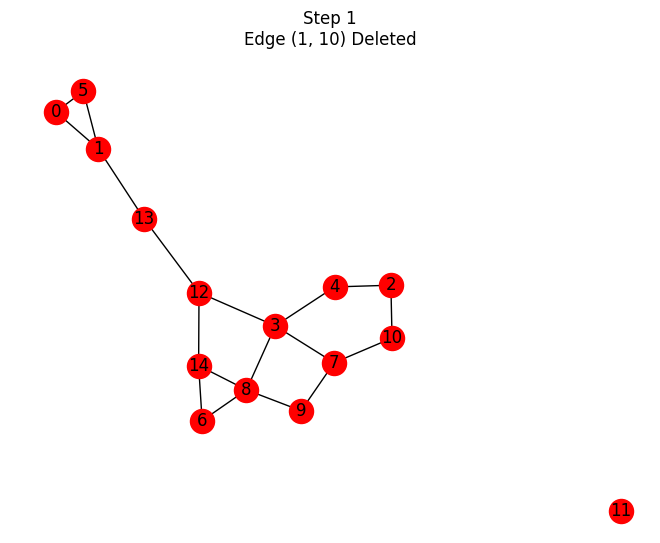

 --------------- 

Step 2
Current modularity: 0.4550173010380623
Best modularity: 0.43055555555555547



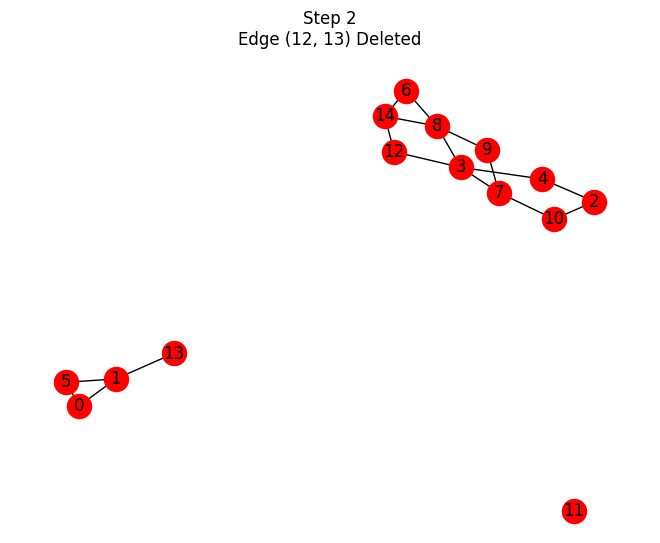

 --------------- 

Step 3
Current modularity: 0.5234375
Best modularity: 0.4550173010380623



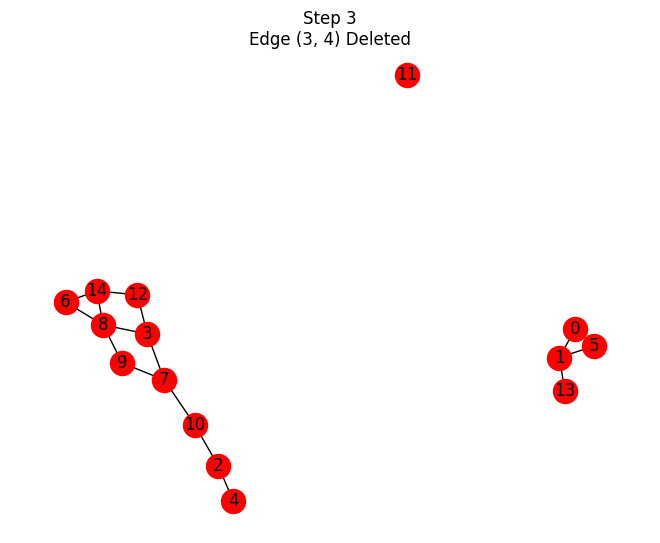

 --------------- 

Step 4
Current modularity: 0.5511111111111111
Best modularity: 0.5234375



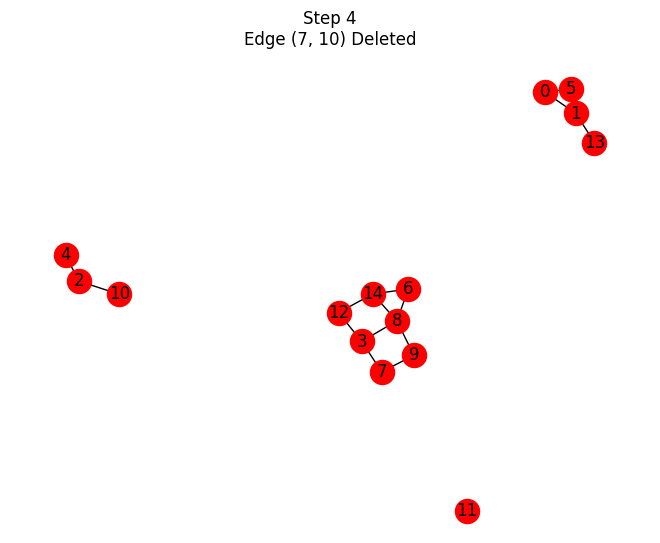

 --------------- 

Step 5
Current modularity: 0.5994897959183674
Best modularity: 0.5511111111111111



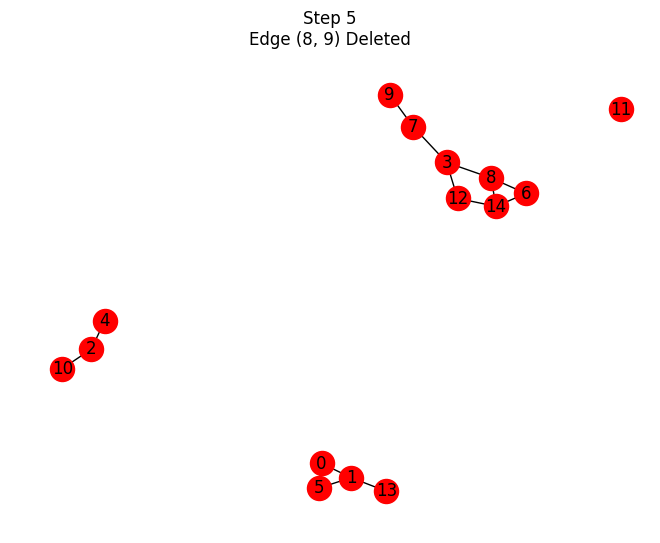

 --------------- 

Step 6
Current modularity: 0.6627218934911242
Best modularity: 0.5994897959183674



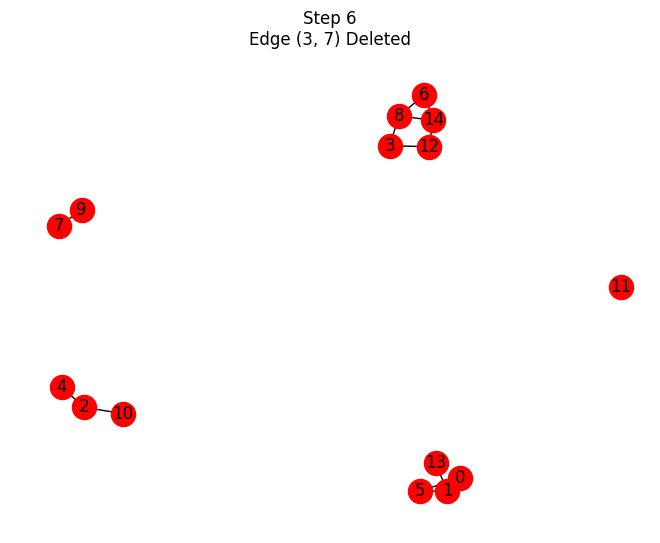

 --------------- 

Step 7
Current modularity: 0.6527777777777777
Best modularity: 0.6627218934911242

Current Modularity is not better than the best modularity. Breaking the loop


In [68]:

# Track modularity
best_modularity = 0
best_communities = None
i=0

# Make a copy of the original graph to avoid modifying it
original_G = G.copy()

while True:
    # Calculate the edge betweenness
    edge_betweenness = nx.edge_betweenness_centrality(G).items()

    # Sort and get the edge to delete 
    edge_betweenness = sorted(edge_betweenness, key=lambda pair: -pair[1])
    edge_to_delete = edge_betweenness[0][0]

    # Store the current communities before removing the edge
    current_communities = community_louvain.best_partition(G)

    # Delete the edge
    G.remove_edge(*edge_to_delete)

    # Calculate modularity
    partition = community_louvain.best_partition(G)
    current_modularity = community_louvain.modularity(partition, G)
    
    print(f'Step {i}\nCurrent modularity: {current_modularity}')
    print(f'Best modularity: {best_modularity}\n')

    # Check if modularity improved
    if current_modularity > best_modularity:
        best_modularity = current_modularity
        best_communities = current_communities # Store this instead of partition, since we want the best community structure, which would be the one before condition fails

        # Redraw the graph
        nx.draw(G, with_labels=True, node_color='r')
        plt.title('Step %s\nEdge %s Deleted'%(i, edge_to_delete), fontsize=12)
        plt.show()
        i+=1
        print(" --------------- \n")
    else:
        # Modularity decreased, stop the algorithm
        print("Current Modularity is not better than the best modularity. Breaking the loop")

        break


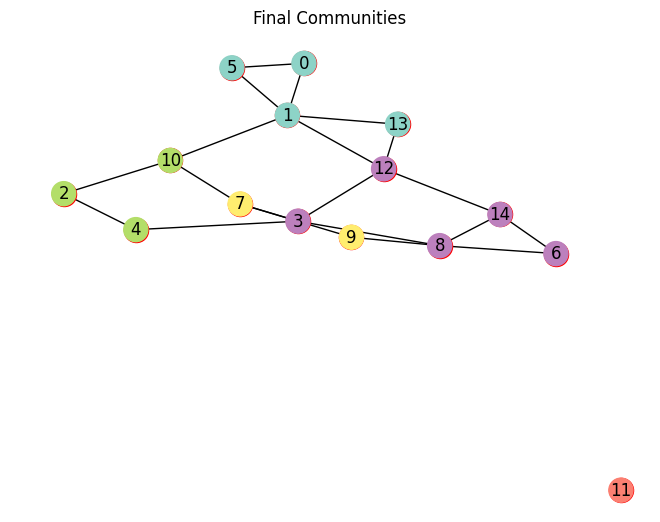

In [69]:
# Redraw the original graph with best communities
# Use original_G here to plot the graph with the highest modularity
pos = nx.spring_layout(original_G) # Use the same layout for consistency
nx.draw(original_G, pos, with_labels=True, node_color='r')

# Color the nodes based on the best communities
node_colors = [best_communities[node] for node in original_G.nodes()]
nx.draw_networkx_nodes(original_G, pos, node_color=node_colors, cmap=plt.cm.Set3)

plt.title('Final Communities', fontsize=12)
plt.show()

In [70]:
# Print the best communities found
print("Best Communities:", best_communities)

Best Communities: {0: 0, 1: 0, 2: 2, 3: 3, 4: 2, 5: 0, 6: 3, 7: 4, 8: 3, 9: 4, 10: 2, 11: 1, 12: 3, 13: 0, 14: 3}
